In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loading and Preprocessing**

**1.Use the Iris dataset available in the sklearn library.**

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.shape

(150, 5)

**Drop the species column since this is a clustering problem.**

In [6]:
X = df.drop('species', axis=1)

In [7]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Clustering Algorithm Implementation

- **KMeans Clustering**

***Provide a brief description of how KMeans clustering works.***

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a pre-defined number of clusters. The goal is to group similar data points together and discover underlying patterns or structures within the data.
- Initialization: Select k centroids.(Elbow method)

- Assignment: Assign each data point to the nearest centroid based on Euclidean distance.

- Update: Recalculate the centroids as the mean of all points in each cluster.

- Repeat: Steps 2 and 3 are repeated until the centroids no longer change significantly or a   maximum number of iterations is reached.

***Explain why KMeans clustering might be suitable for the Iris dataset.***

The Iris dataset is small, numeric, and well-structured, making it easy for KMeans to process efficiently. It has inherent grouping based on species. Since the number of species  is known, KMeans can produce meaningful and interpretable clusters, which can be compared with the actual species labels for evaluation.

***Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.***

In [10]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
normalisation = MinMaxScaler()
X=normalisation.fit_transform(X)
# Coverting to Dataframe
X=pd.DataFrame(X)
X.describe()


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1, 11):
   model = KMeans(
    n_clusters=n,
    init='k-means++',
    max_iter=500,
    random_state=42,
    n_init=10
   )
   model.fit(X)
   inertia.append(model.inertia_)

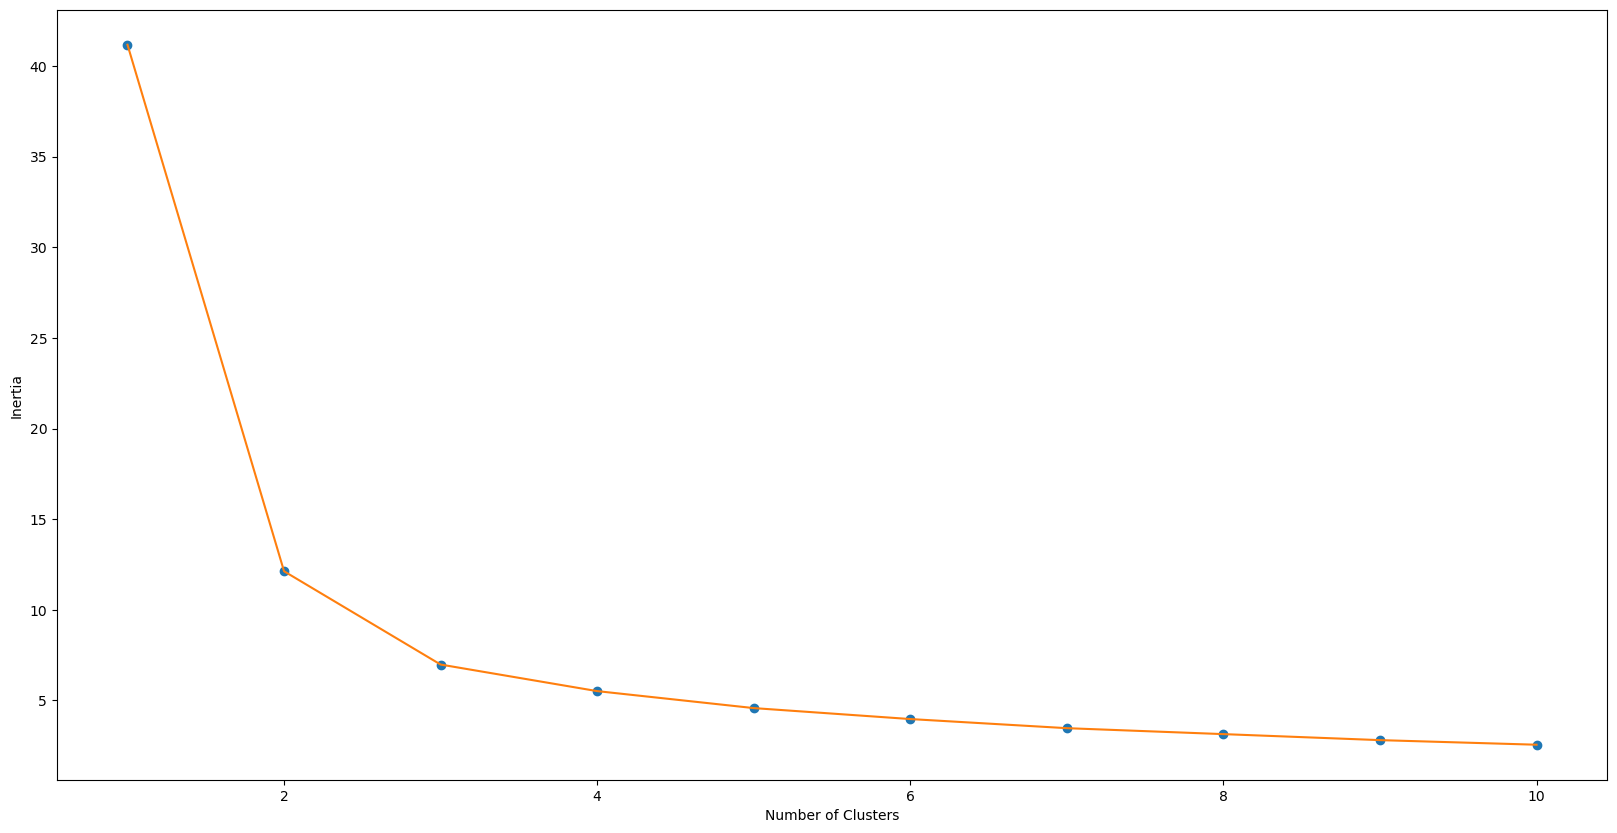

In [16]:
plt.figure(1 , figsize = (20, 10))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [25]:
model = KMeans(n_clusters = 2,
            init='k-means++',

            max_iter=500,
            random_state=42)
model.fit(X)
labels = model.labels_
#centroids = model.cluster_centers_

df['cluster'] =  labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [26]:
df['cluster'].unique()

array([1, 0], dtype=int32)

In [27]:
import plotly.express as px

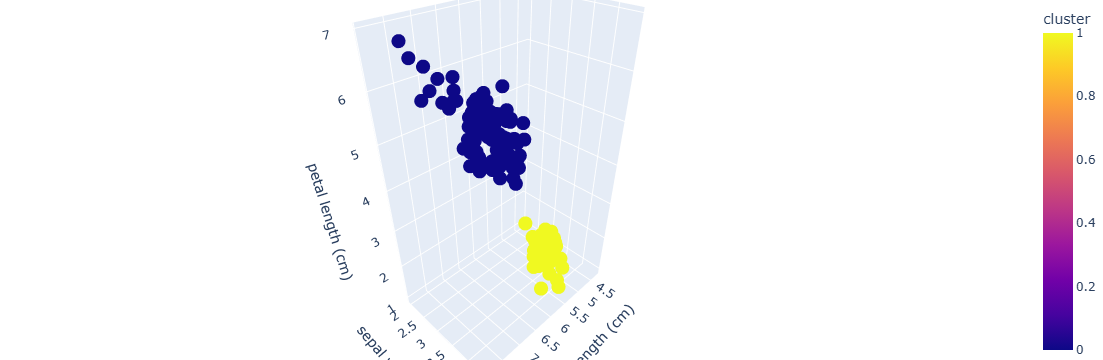

In [30]:
fig = px.scatter_3d(
    df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    z="petal length (cm)",
    color='cluster',  # cluster labels from KMeans
    hover_data=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"],
    category_orders={"cluster": range(0, 2)}  # since k=2
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [32]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6300471284354711


**ANOTHER EXAMPLE**

In [33]:
#if k =3
model = KMeans(n_clusters = 3,
            init='k-means++',

            max_iter=500,
            random_state=42)
model.fit(X)
labels = model.labels_
#centroids = model.cluster_centers_

df['cluster'] =  labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [34]:
df['cluster'].unique()

array([1, 0, 2], dtype=int32)

In [35]:
import plotly.express as px

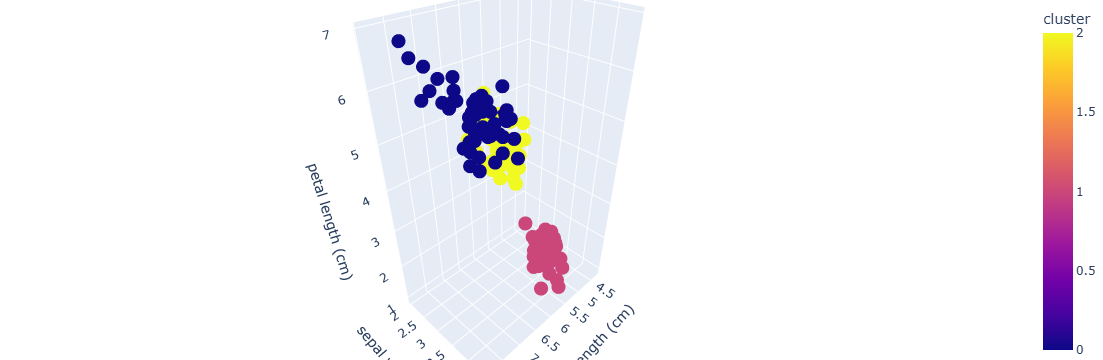

In [36]:
fig = px.scatter_3d(
    df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    z="petal length (cm)",
    color='cluster',  # cluster labels from KMeans
    hover_data=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"],
    category_orders={"cluster": range(0, 2)}  # since k=2
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [37]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.48292893354301647


Silhouette Score measures how well points are clustered. For cluster '3' it's  0.48292893354301647 and for cluster '2' it's  0.6300471284354711.

- **Hierarchical Clustering**

**Provide a brief description of how Hierarchical clustering works.**

Hierarchical clustering is an unsupervised learning algorithm that builds a hierarchy of clusters either bottom-up (agglomerative) or top-down (divisive).
- Agglomerative (most common):At each step, merge the two closest clusters based on a distance metric,repeat umtil become single cluster.
- Divisive:Recursively split clusters until each point is its own cluster.
  
The result is often visualized as a dendrogram, which shows the hierarchy of clusters and helps determine the optimal number of clusters.

**Explain why Hierarchical clustering might be suitable for the Iris dataset.**

- The Iris dataset is small and numeric, which makes hierarchical clustering computationally feasible.

- Hierarchical clustering does not require pre-defining the number of clusters, allowing exploration of natural groupings.

- It produces a dendrogram, which can help visualize how species relate to each other and how clusters merge.

**Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.**

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


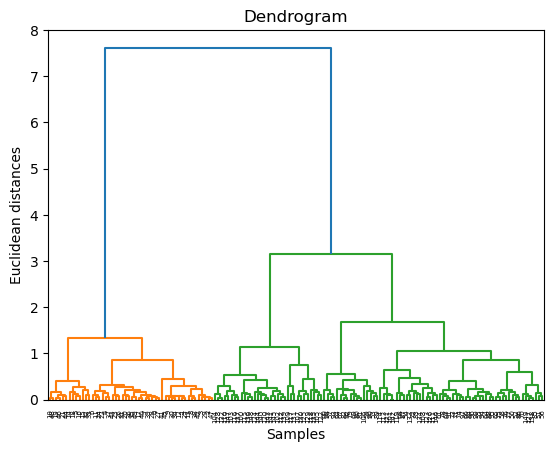

In [40]:
import scipy.cluster.hierarchy as sc
dendrogram = sc.dendrogram(sc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hca = hca.fit_predict(X)

In [42]:
y_hca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
df['cluster_hca'] = y_hca

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster,cluster_hca
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,1,1


In [45]:
df['cluster_hca'].unique()

array([1, 0])

In [46]:
df['cluster_hca'].value_counts()

cluster_hca
0    100
1     50
Name: count, dtype: int64

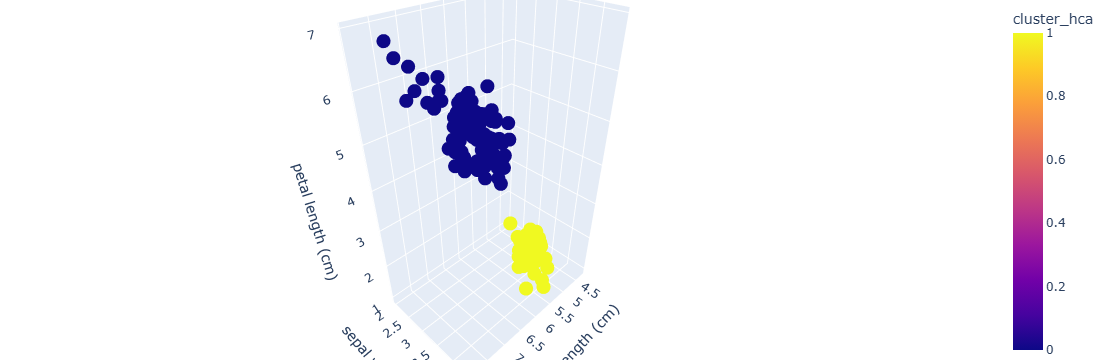

In [48]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    z="petal length (cm)",
    color='cluster_hca',  
    hover_data=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"],
    category_orders={"cluster_hca": range(0, 2)}  
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [50]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_hca)
print("Silhouette Score:", score)

Silhouette Score: 0.6300471284354711
